# Decision Tree: Offensive vs Defensive Players

## Why Decision Trees?
While logistic regression performed well, decision trees are different in that:
1. They can capture non-linear and non-logistic relationships in the data
2. They provide clear decision rules that are easy to interpret
3. They can handle both numerical and categorical features effectively
4. They can be more efficient

## Our Task
We'll use a decision tree to classify EA FC 24 players as either offensive or defensive based on their attributes. This binary classification task will demonstrate how decision trees can create complex decision boundaries.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the Seaborn theme
sns.set_theme()

## Understanding Our Dataset
Let's examine the key attributes we'll use to distinguish between offensive and defensive players:
- Shooting, Pace, Dribbling (typically higher for offensive players)
- Defending, Physical (typically higher for defensive players)

We would use all 5 attributes to train our model.

Decision trees can create complex decision boundaries by splitting the feature space into regions, which might be particularly effective for players with mixed attributes.

In [37]:
players_df = pd.read_csv("../data/players_data.csv")

# Define offensive and defensive positions
offensive_positions = ['ST', 'CF', 'LW', 'RW', 'CAM']
defensive_positions = ['CB', 'LB', 'RB', 'CDM', 'LWB', 'RWB']

# Create target variable (1 for offensive, 0 for defensive)
def get_position_class(position_str):
    positions = str(position_str).split(', ')
    if any(pos in offensive_positions for pos in positions):
        return 1
    elif any(pos in defensive_positions for pos in positions):
        return 0
    return None

# Prepare the data
players_df['position_class'] = players_df['player_positions'].apply(get_position_class)

# Filter only offensive and defensive players. We'll remove ambiguous players.
filtered_df = players_df[players_df['position_class'].notna()]

features = ["shooting", "defending", "pace", "dribbling", "physic"]
# Select features for classification
X = filtered_df[features].values
y = filtered_df['position_class'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_89744/1371891128.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Model Training

In [38]:
# Instantiate and train the decision tree model
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Feature Importance
Let's analyze which features were most important in our decision tree model.

Unlike our previous models that weighed in all 5 attributes, the decision tree was able to predict with great accuracy, the classifications, using only 3 of them. 

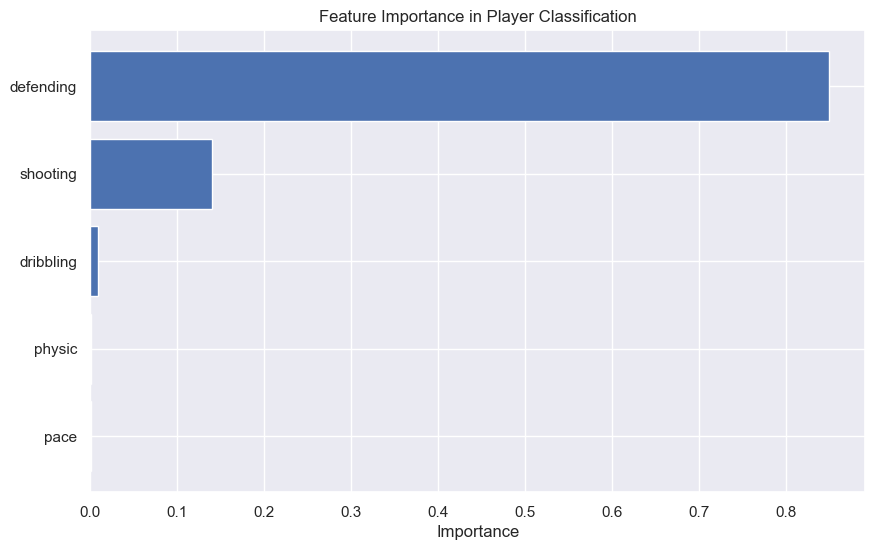

In [39]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': decision_tree.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Player Classification')
plt.xlabel('Importance')
plt.show()

## Model Performance Evaluation

Let's evaluate our model's performance using a confusion matrix and classification report.

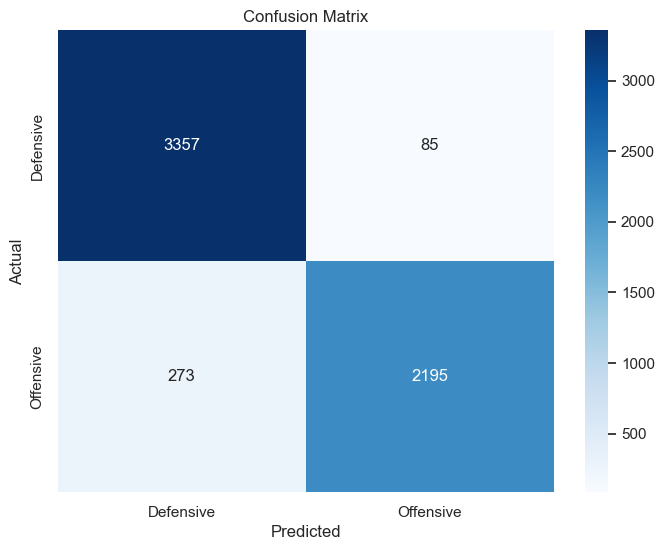


Classification Report:
              precision    recall  f1-score   support

   Defensive       0.92      0.98      0.95      3442
   Offensive       0.96      0.89      0.92      2468

    accuracy                           0.94      5910
   macro avg       0.94      0.93      0.94      5910
weighted avg       0.94      0.94      0.94      5910



In [40]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = decision_tree.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create labels for the classes
class_labels = ['Defensive', 'Offensive']

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

## Seperation Analysis
From the graph we can see the lines corresponding to the decisions made against shooting and defending statistics, the two dominant stats. 
Only one decision node exists for dribbling. 

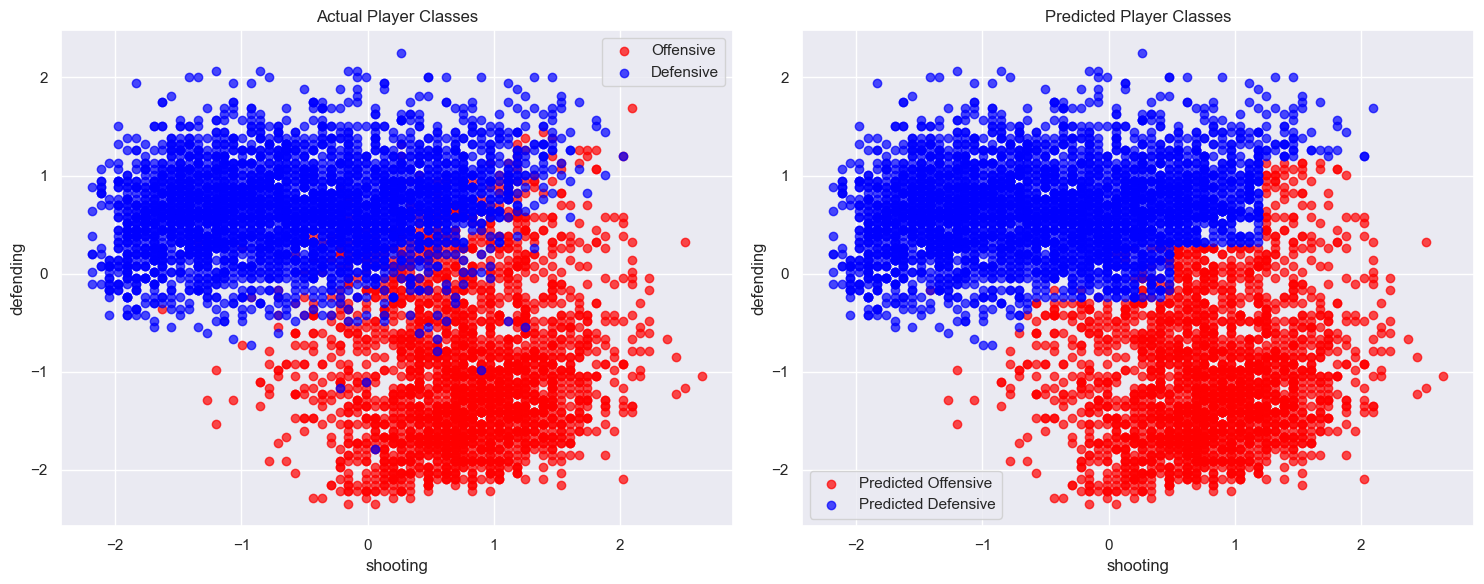

In [42]:
# Create two subplots side by side
plt.figure(figsize=(15, 6))

# First subplot - Actual classes
plt.subplot(1, 2, 1)
top_features = feature_importance.tail(2)['Feature'].values

# Plot actual offensive players (y_test == 1) in red
plt.scatter(X_test[y_test == 1, 0], 
           X_test[y_test == 1, 1],
           label='Offensive', alpha=0.7, color='red')

# Plot actual defensive players (y_test == -1) in blue
plt.scatter(X_test[y_test == 0, 0], 
           X_test[y_test == 0, 1],
           label='Defensive', alpha=0.7, color='blue')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Actual Player Classes')
plt.legend()

# Second subplot - Predicted classes
plt.subplot(1, 2, 2)

# Plot predicted offensive players (y_pred == 1) in red
plt.scatter(X_test[y_pred == 1, 0], 
           X_test[y_pred == 1, 1],
           label='Predicted Offensive', alpha=0.7, color='red')

# Plot predicted defensive players (y_pred == -1) in blue
plt.scatter(X_test[y_pred == 0, 0], 
           X_test[y_pred == 0, 1],
           label='Predicted Defensive', alpha=0.7, color='blue')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Predicted Player Classes')
plt.legend()

plt.tight_layout()
plt.show()